# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

The problem is to identify the pattern of job postings and classify it in to relevant salary categories. After learning the pattern, it is used to classify the job postings in the test data set and predict the salary

In [1]:
#import your libraries
import pandas as pd
import sklearn as sk
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#your info here
__author__ = "bibind vasu"
__email__ = "bvasu@uchicago.edu"

//anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe
df_job = pd.read_csv('train_features.csv')  
df_sal = pd.read_csv("train_salaries.csv")
df_test = pd.read_csv("test_features.csv")

In [3]:
df_job.head(30)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [4]:
df_sal.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
df_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [6]:
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [7]:
df_job.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [8]:
df_sal.describe()

,salary
count,1000000.000000
mean,116.061818
std,38.717936
min,0.000000
25%,88.000000
50%,114.000000
75%,141.000000
max,301.000000


### ---- 3 Clean the data ----

In [9]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

#Looking for duplicate data
df_job["is_duplicate"]= df_job.duplicated()

dups_job = df_job.pivot_table(index=['jobId'], aggfunc='size')
sum(dups_job)


1000000

In [10]:
#number of unique job ids
df_sal['jobId'].nunique()

1000000

In [11]:
df_job['jobId'].nunique()

1000000

In [12]:
#Looking for salary less than o
df_sal['salary'].agg(lambda x: sum(x < 0))
    

0

In [13]:
df_job.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'is_duplicate'],
      dtype='object')

In [14]:
df_job.jobType.value_counts()

SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64

In [15]:
df_job.degree.value_counts()

HIGH_SCHOOL    236976
NONE           236854
BACHELORS      175495
DOCTORAL       175364
MASTERS        175311
Name: degree, dtype: int64

In [16]:
df_job.industry.value_counts()

WEB          143206
AUTO         142943
FINANCE      142867
EDUCATION    142819
OIL          142771
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64

### Merging training values and target values on JobID

In [17]:
# Merging training values and target values on JobID
df_tot = pd.merge(df_job, df_sal, on='jobId')

In [18]:
#Deleting orignal dataframes
del df_job
del df_sal

In [19]:
df_tot.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,is_duplicate,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,False,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,False,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,False,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,False,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,False,163


In [20]:
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   is_duplicate         1000000 non-null  bool  
 9   salary               1000000 non-null  int64 
dtypes: bool(1), int64(3), object(6)
memory usage: 77.2+ MB


### ---- 4 Explore the data (EDA) ----

In [21]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

## Summarize each feature variable

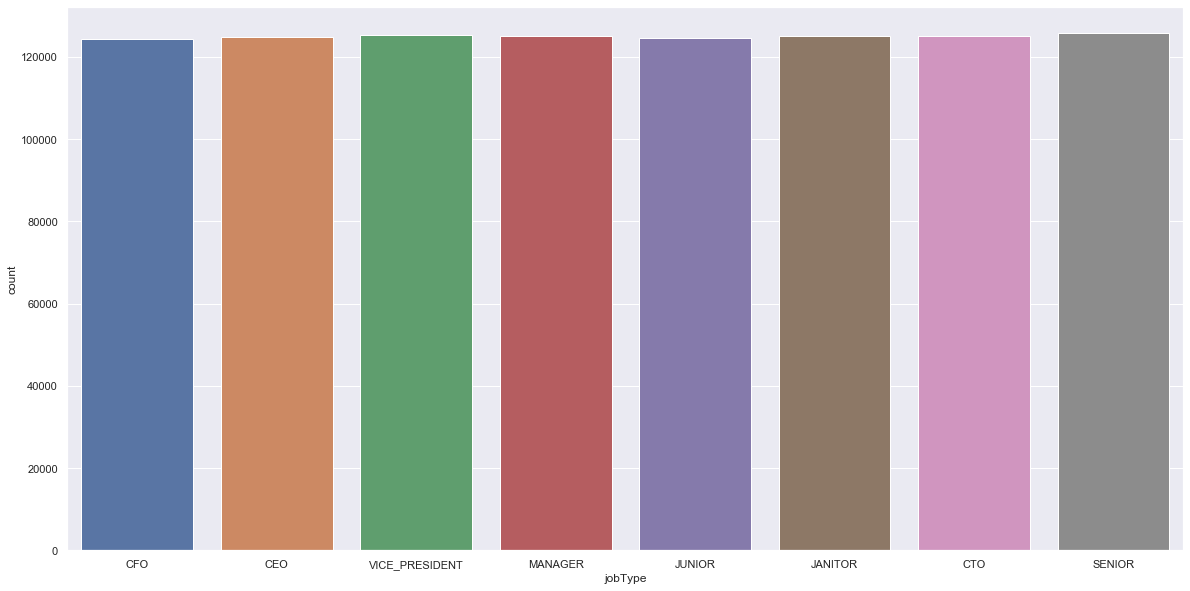

In [22]:

sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='jobType', data=df_tot)

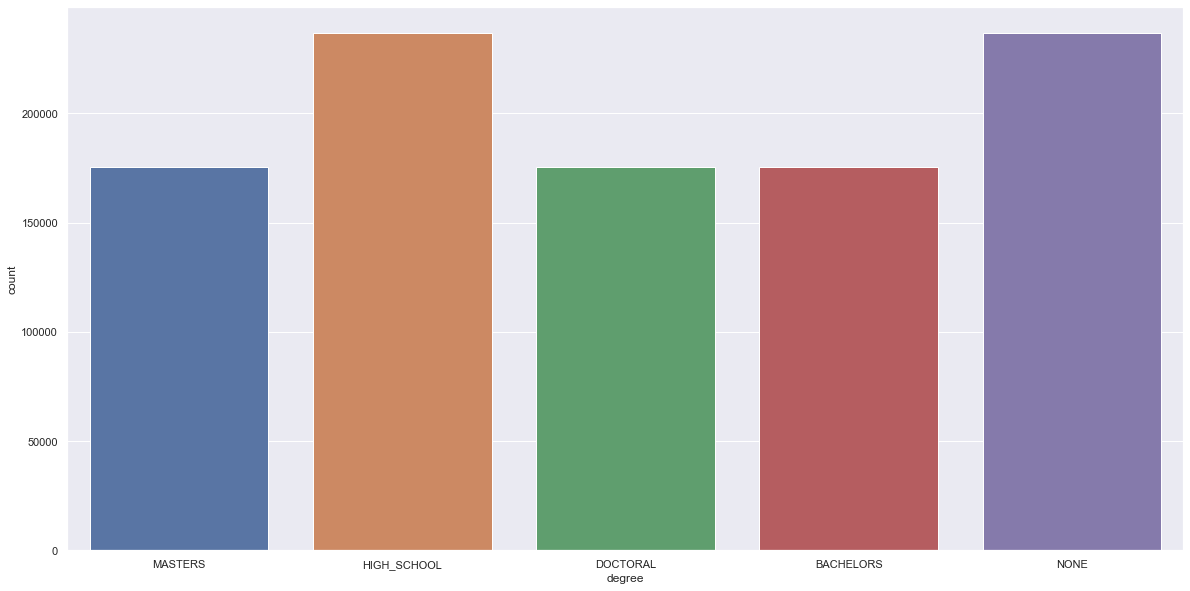

In [23]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='degree', data=df_tot)

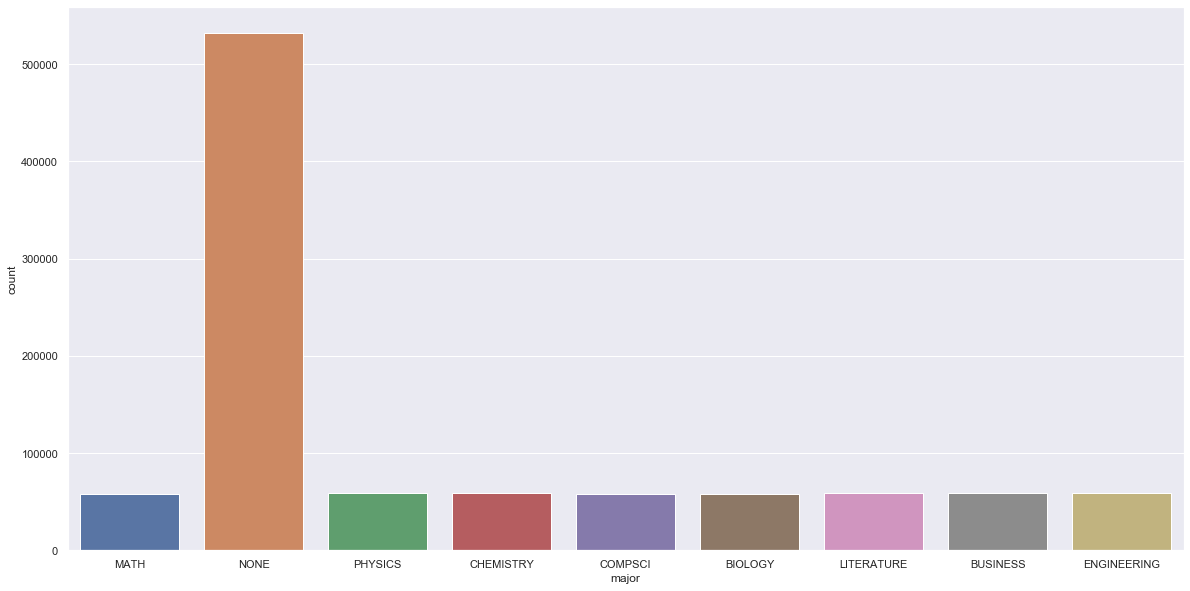

In [24]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='major', data=df_tot)

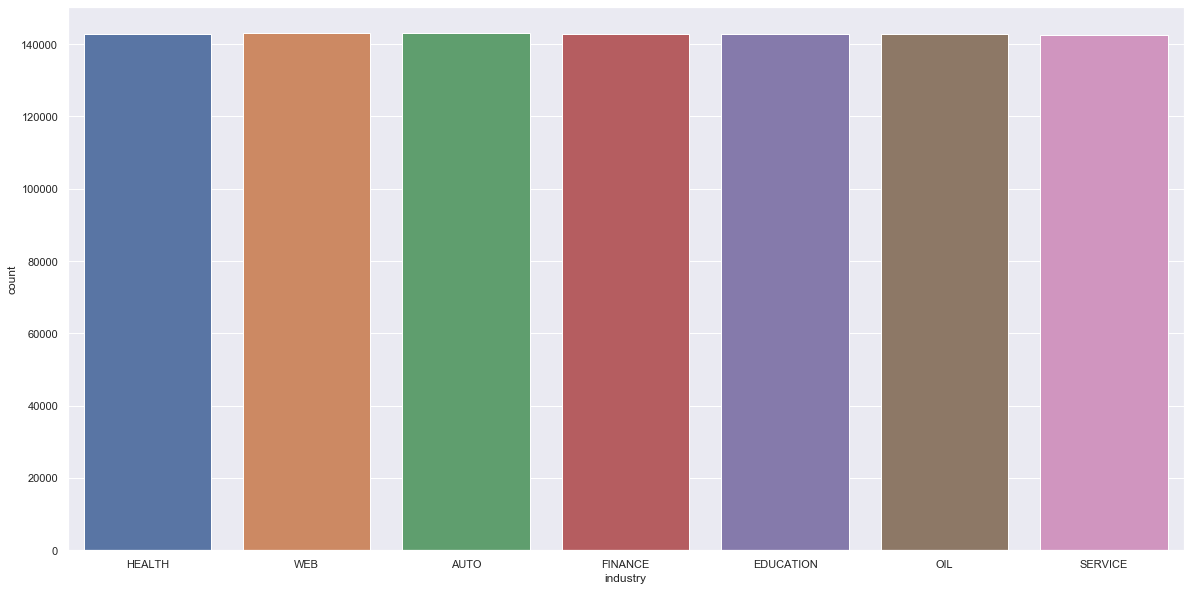

In [25]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='industry', data=df_tot)

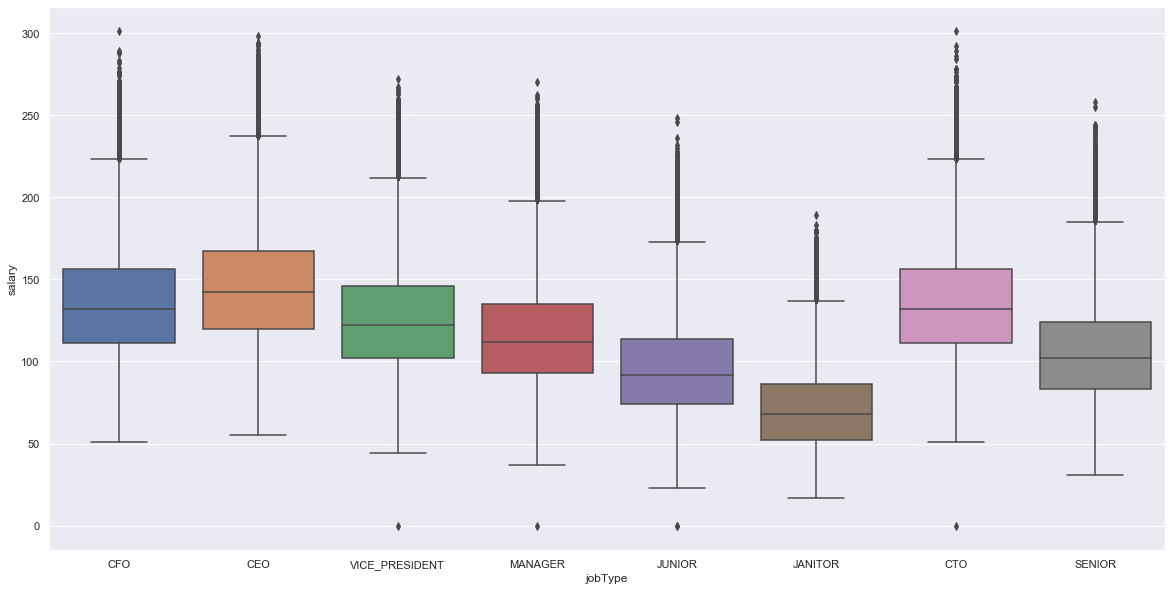

In [26]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))

sns.boxplot(data = df_tot, x='jobType', y='salary')

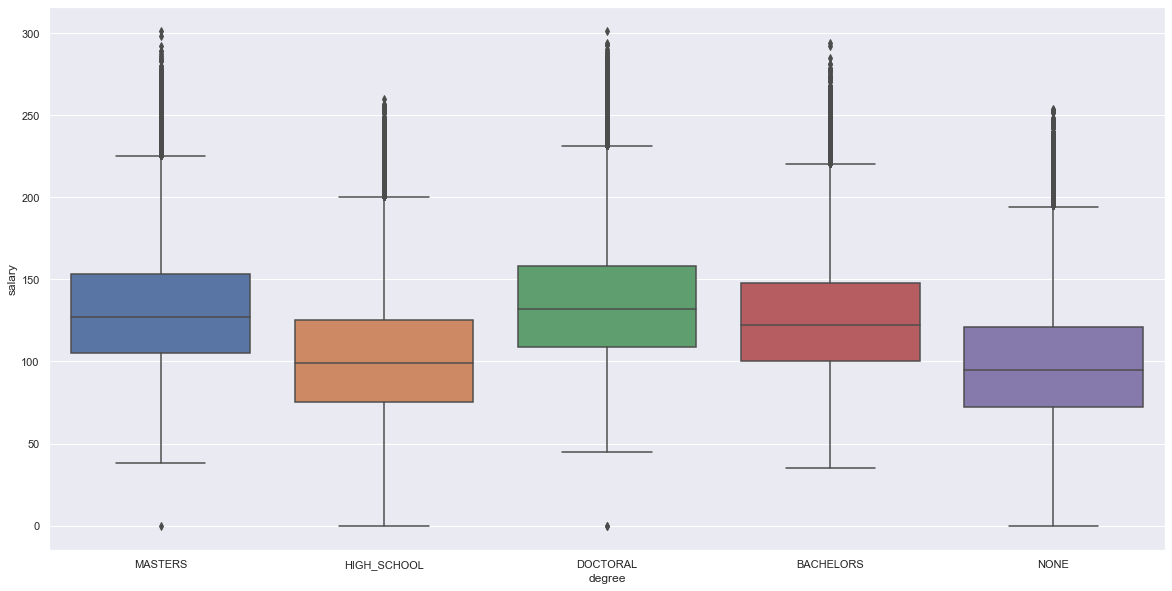

In [27]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))

sns.boxplot(data = df_tot, x='degree', y='salary')

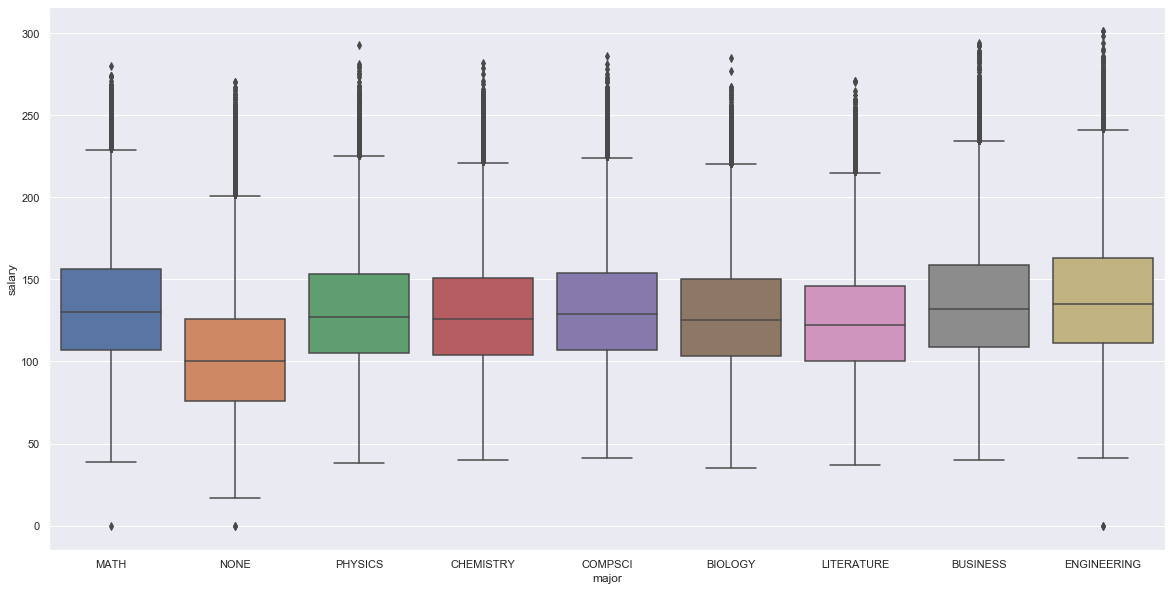

In [28]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))

sns.boxplot(data = df_tot, x='major', y='salary')

## Visualizing Target Variable

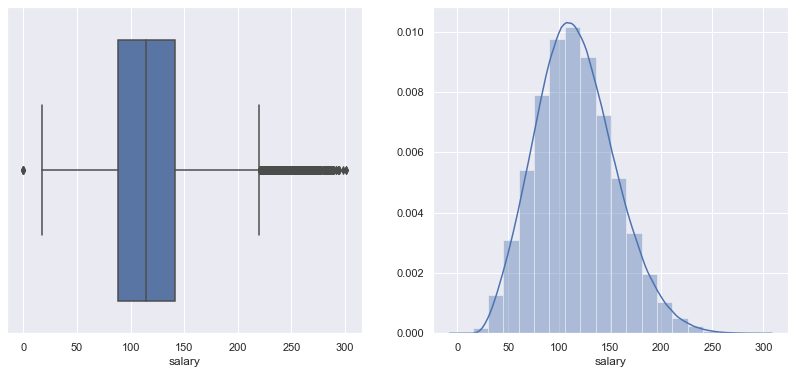

In [29]:
#Visualize Target Variable
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(df_tot.salary)
plt.subplot(1,2,2)
sns.distplot(df_tot.salary, bins=20)
plt.show()


In [30]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

lower_range,upper_range = outlier_treatment(df_tot['salary'])

print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper_range, lower_range))

The upper and lower bounds for suspected outliers are 220.5 and 8.5.


###  Examining potential outliers

In [31]:
df_tot[df_tot.salary<8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,is_duplicate,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,False,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,False,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,False,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,False,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,False,0


In [32]:
df_tot[df_tot.salary>220.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,is_duplicate,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,False,223
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,False,223
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,False,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,False,240
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,False,225
...,...,...,...,...,...,...,...,...,...,...
998516,JOB1362685406203,COMP29,CFO,MASTERS,ENGINEERING,WEB,14,46,False,227
999249,JOB1362685406936,COMP30,CEO,NONE,NONE,OIL,17,10,False,223
999280,JOB1362685406967,COMP2,CFO,BACHELORS,BUSINESS,SERVICE,21,0,False,228
999670,JOB1362685407357,COMP20,CEO,DOCTORAL,LITERATURE,SERVICE,24,14,False,233


In [33]:
# Examining job types with Junior and salary more than 220.5
df_tot[(df_tot.jobType == "JUNIOR") & (df_tot.salary >220.5)]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,is_duplicate,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,False,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,False,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,False,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,False,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,False,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,False,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,False,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,False,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,False,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,False,221


In [34]:
# Examining job type with Janitor and salary more than 220.5
df_tot[(df_tot.jobType == "JANITOR") & (df_tot.salary >220.5)]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,is_duplicate,salary


The junior positions are with high qualifications in highly paying industries. So these outliers appear to be genuine. 
The salary with zreo appear to missing data as qualifications are high and do not seem to be volunteers. So these rows are removed from subsequent analysis.

In [35]:
# Removing the rows with salary less than 0
df_tot = df_tot[df_tot.salary>8.5]

## Creating numerical and categorical variables

In [36]:
# Creating a data set of Category variables
ds_cat = df_tot.select_dtypes(include = 'object').copy()
categorical_columns = ds_cat.columns
categorical_columns


Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry'], dtype='object')

In [37]:
numerical_columns = ['yearsExperience', 'milesFromMetropolis']

In [38]:
ds_cat = ds_cat.drop(['jobId'], axis=1)
ds_cat['salary'] = df_tot.loc[ds_cat.index, 'salary'].copy()

###  Examing the relation with salary for categorical variables

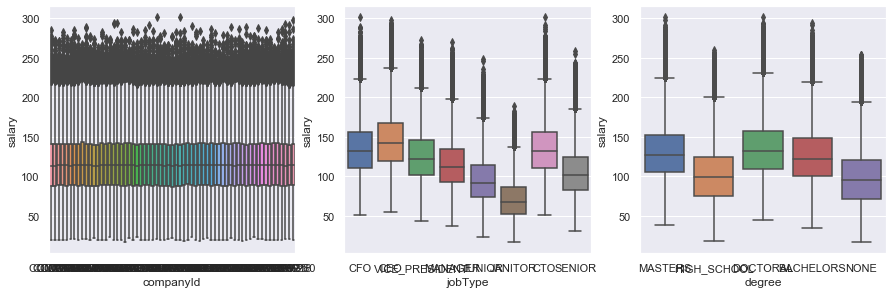

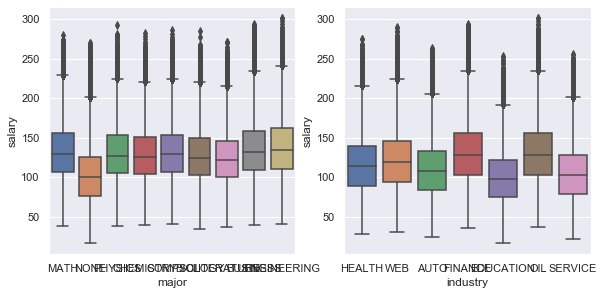

<Figure size 1080x720 with 0 Axes>

In [39]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(ds_cat.columns):
    if ix <= 3:
        if c != 'salary':
            
            ax1 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=ds_cat, x=c, y='salary', ax=ax1)
            
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1


### Plotting numerical variables with target Salary

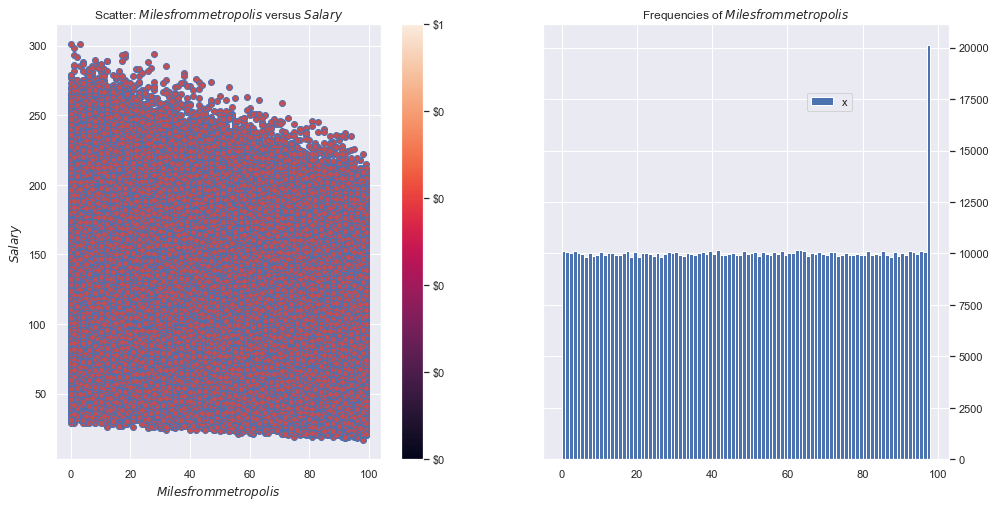

In [40]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))

sctr = ax1.scatter(x=df_tot.milesFromMetropolis, y=df_tot.salary, marker='o', c='r', edgecolor='b')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_title('Scatter: $Miles from metropolis$ versus $Salary$')
ax1.set_xlabel('$Miles from metropolis$')
ax1.set_ylabel('$Salary$')

ax2.hist(df_tot.milesFromMetropolis, bins=np.arange(df_tot.milesFromMetropolis.min(), df_tot.milesFromMetropolis.max()),
         label=('x'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $Miles from metropolis$')
ax2.yaxis.tick_right()

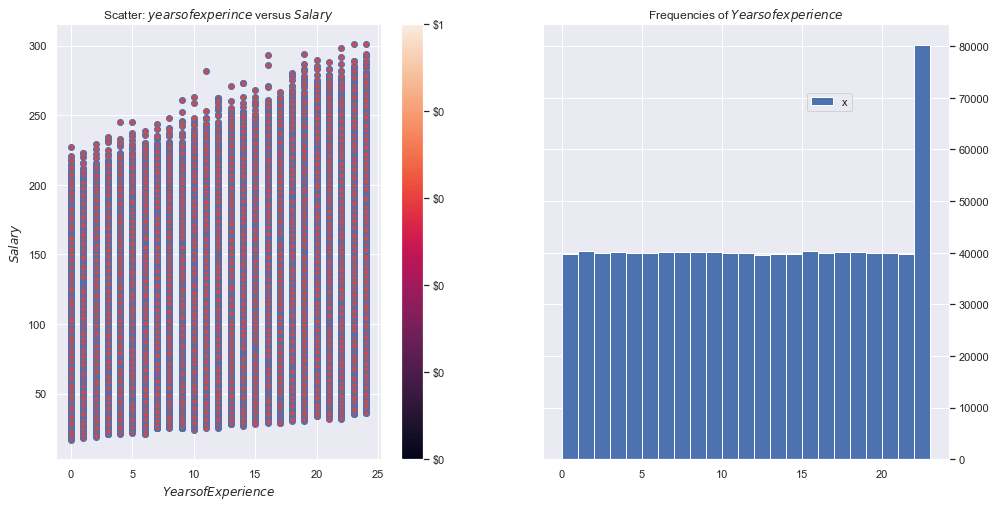

In [41]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))

sctr = ax1.scatter(x=df_tot.yearsExperience, y=df_tot.salary, marker='o', c='r', edgecolor='b')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_title('Scatter: $years of experince$ versus $Salary$')
ax1.set_xlabel('$Years of Experience$')
ax1.set_ylabel('$Salary$')

ax2.hist(df_tot.yearsExperience, bins=np.arange(df_tot.yearsExperience.min(), df_tot.yearsExperience.max()),
         label=('x'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $Years of experience$')
ax2.yaxis.tick_right()

Miles from metropolis is negatively correlated with Salary
years of experience id positively correlated with Salary

## Group by variables with Salary

In [39]:
#two-way table
from itertools import groupby

df_tot.groupby(['major'],as_index=False)['salary'].mean()


,major,salary
0,BIOLOGY,127.932664
1,BUSINESS,135.648980
2,CHEMISTRY,129.072085
3,COMPSCI,132.075605
4,ENGINEERING,138.441342
5,LITERATURE,124.423097
6,MATH,133.322042
7,NONE,102.583864
8,PHYSICS,130.372436


In [40]:
df_tot.groupby(['industry'],as_index=False)['salary'].mean()

,industry,salary
0,AUTO,109.435222
1,EDUCATION,99.448386
2,FINANCE,130.747659
3,HEALTH,115.735540
4,OIL,130.953863
5,SERVICE,104.446820
6,WEB,121.645362


## Correlation between features and Salary variable

In [41]:
def encode_label(df, col):
    #encode the categories using average salary for each category to replace label
    cat_dict ={}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train_df[train_df[col] == cat]['salary'].mean()   
    df[col] = df[col].map(cat_dict)
    return df[col]

In [42]:
for col in df_tot.columns:
    if df_tot[col].dtype.name == "category":
        df_tot[col]=encode_label(df_tot, col)

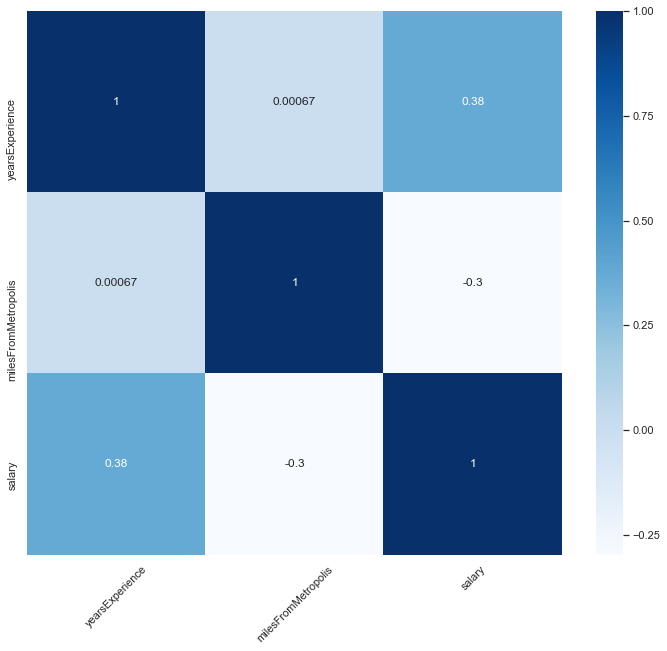

In [43]:
# Correlations between selected features and response
# jobId is discarded because it is unique for individual
fig = plt.figure(figsize=(12, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(df_tot[features + ['salary']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

### ---- 5 Establish a baseline ----

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation
''' Ran in to Memory issues and could not run the code below'''

'''def one_hot_encode_feature_df(df, cat_vars=None, num_vars=None):
    '''performs one-hot encoding on all categorical variables and combines result with continous variables'''
    # creating instance of one-hot-encoder
    enc = OneHotEncoder(handle_unknown='ignore')
    cat_df = pd.get_dummies(df[cat_vars])
    num_df = df[num_vars].apply(pd.to_numeric)
    return pd.concat([cat_df, num_df], axis=1)#,ignore_index=False)

def train_model(model, feature_df, target_df, num_procs, mean_mse, cv_std):
    neg_mse = cross_val_score(model, feature_df, target_df, cv=2, n_jobs=num_procs, scoring='neg_mean_squared_error')
    mean_mse[model] = -1.0*np.mean(neg_mse)
    cv_std[model] = np.std(neg_mse)
    
def get_target_df(df, target):
    '''returns target dataframe'''
    return df[salary]  

#encode categorical data and get final feature dfs
print("Encoding data")

categorical_vars = ['companyId', 'jobType', 'degree', 'major', 'industry']
numeric_vars = ['yearsExperience', 'milesFromMetropolis']
target_var = 'salary'

feature_df = one_hot_encode_feature_df(df_tot, cat_vars=categorical_columns, num_vars=numerical_columns)
test_df = one_hot_encode_feature_df(df_test, cat_vars=categorical_columns, num_vars=numerical_columns)

#get target df


target_df = get_target_df(df_tot, target_var)'''

Encoding data


In [45]:
# Train Features
categorical_vars = ['companyId', 'jobType', 'degree', 'major', 'industry']
numeric_vars = ['yearsExperience', 'milesFromMetropolis']
target_var = 'salary'

cat_df_1 = pd.get_dummies(df_tot['companyId'])
cat_df_2 = pd.get_dummies(df_tot['jobType'])
cat_df_3 = pd.get_dummies(df_tot['degree'])
cat_df_4 = pd.get_dummies(df_tot['major'])
cat_df_5 = pd.get_dummies(df_tot['industry'])
num_df = df_tot[numeric_vars].apply(pd.to_numeric)
feature_df = pd.concat([cat_df_1,cat_df_2,cat_df_3,cat_df_4,cat_df_5, num_df], axis=1)

In [46]:
target_df = df_tot['salary']

In [47]:
# Test Features
categorical_vars = ['companyId', 'jobType', 'degree', 'major', 'industry']
numeric_vars = ['yearsExperience', 'milesFromMetropolis']
target_var = 'salary'

cat_df_1 = pd.get_dummies(df_test['companyId'])
cat_df_2 = pd.get_dummies(df_test['jobType'])
cat_df_3 = pd.get_dummies(df_test['degree'])
cat_df_4 = pd.get_dummies(df_test['major'])
cat_df_5 = pd.get_dummies(df_test['industry'])
num_df = df_test[numeric_vars].apply(pd.to_numeric)
test_df = pd.concat([cat_df_1,cat_df_2,cat_df_3,cat_df_4,cat_df_5, num_df], axis=1)

In [48]:
#exploring the features after one-hot encoding
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 94 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   COMP0                999995 non-null  uint8
 1   COMP1                999995 non-null  uint8
 2   COMP10               999995 non-null  uint8
 3   COMP11               999995 non-null  uint8
 4   COMP12               999995 non-null  uint8
 5   COMP13               999995 non-null  uint8
 6   COMP14               999995 non-null  uint8
 7   COMP15               999995 non-null  uint8
 8   COMP16               999995 non-null  uint8
 9   COMP17               999995 non-null  uint8
 10  COMP18               999995 non-null  uint8
 11  COMP19               999995 non-null  uint8
 12  COMP2                999995 non-null  uint8
 13  COMP20               999995 non-null  uint8
 14  COMP21               999995 non-null  uint8
 15  COMP22               999995 non-null  uint8
 16  CO

In [49]:
#exploring the features of test data set after one-hot encoding
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 94 columns):
 #   Column               Non-Null Count    Dtype
---  ------               --------------    -----
 0   COMP0                1000000 non-null  uint8
 1   COMP1                1000000 non-null  uint8
 2   COMP10               1000000 non-null  uint8
 3   COMP11               1000000 non-null  uint8
 4   COMP12               1000000 non-null  uint8
 5   COMP13               1000000 non-null  uint8
 6   COMP14               1000000 non-null  uint8
 7   COMP15               1000000 non-null  uint8
 8   COMP16               1000000 non-null  uint8
 9   COMP17               1000000 non-null  uint8
 10  COMP18               1000000 non-null  uint8
 11  COMP19               1000000 non-null  uint8
 12  COMP2                1000000 non-null  uint8
 13  COMP20               1000000 non-null  uint8
 14  COMP21               1000000 non-null  uint8
 15  COMP22               1000000 non-

In [50]:
#initialize model list and dicts
models = []
mean_mse = {}
cv_std = {}
res = {}

#define number of processes to run in parallel
num_procs = 2

#shared model paramaters
verbose_lvl = 0

In [51]:
def train_model(model, feature_df, target_df, num_procs, mean_mse, cv_std):
    neg_mse = cross_val_score(model, feature_df, target_df, cv=2, n_jobs=num_procs, scoring='neg_mean_squared_error')
    mean_mse[model] = -1.0*np.mean(neg_mse)
    cv_std[model] = np.std(neg_mse)
    
def print_summary(model, mean_mse, cv_std):
    print('\nModel:\n', model)
    print('Average MSE:\n', mean_mse[model])
    print('Standard deviation during CV:\n', cv_std[model])

def save_results(model, mean_mse, predictions, feature_importances):
    '''saves model, model summary, feature importances, and predictions'''
    with open('model.txt', 'w') as file:
        file.write(str(model))
    feature_importances.to_csv('feature_importances.csv') 
    np.savetxt('predictions.csv', predictions, delimiter=',')




In [76]:
#create models -- hyperparameter tuning already done by hand for each model
lr = LinearRegression()
lr_std_pca = make_pipeline(StandardScaler(), PCA(), LinearRegression())
rf = RandomForestRegressor(n_estimators=150, n_jobs=num_procs, max_depth=25, min_samples_split=60, \
                           max_features=30, verbose=verbose_lvl)
gbm = GradientBoostingRegressor(n_estimators=150, max_depth=5, loss='ls', verbose=verbose_lvl)
                      
models.extend([lr, lr_std_pca, rf, gbm])

#parallel cross-validate models, using MSE as evaluation metric, and print summaries
print("Beginning cross validation")
for model in models:
    train_model(model, feature_df, target_df, num_procs, mean_mse, cv_std)
    print_summary(model, mean_mse, cv_std)

Beginning cross validation

Model:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Average MSE:
 384.4943260971753
Standard deviation during CV:
 1.3982874396500335

Model:
 Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)
Average MSE:
 384.5039450290153
Standard deviation during CV:
 1.3935481382186765

Model:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features=30, max_leaf_nodes=None,
                      min_impurity_decreas

In [ ]:
#choose model with lowest mse
model = min(mean_mse, key=mean_mse.get)
print('\nPredictions calculated using model with lowest MSE:')
print(model)

#train model on entire dataset
model.fit(feature_df, target_df)

#create predictions based on test data
predictions = model.predict(df_test)


Predictions calculated using model with lowest MSE:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


ValueError: could not convert string to float: 'OIL'

In [ ]:
#store feature importances
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
else:
    #linear models don't have feature_importances_
    importances = [0]*len(feature_df.columns)
    
feature_importances = pd.DataFrame({'feature':feature_df.columns, 'importance':importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
#set index to 'feature'
feature_importances.set_index('feature', inplace=True, drop=True)

#save results
save_results(model, mean_mse[model], predictions, feature_importances)